<hr style="border:2px solid #808080"> </hr>
<center><h1 style="color:#03122E;"> Álgebra Lineal Numérica IMT2111</h1></center>
<center><h1 style="color:#173F8A;"> Capítulo 3</h3></center>
<center><h1 style="color:#0176DE;"> Prof. Manuel A. Sánchez</h3></center>
<hr style="border:2px solid #808080"> </hr>

<h1>Tabla de Contenidos<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Diferencias-Finitas">Diferencias Finitas</a></span><ul class="toc-item"><li><span><a href="#Grafica" data-toc-modified-id="grafica">Solucion aproximada:</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from IPython.display import display, HTML
display(HTML("""<style>.output {display: flex;align-items: center;text-align: center;}</style>"""))

## Algoritmo: Steepest descent

In [2]:
from numpy.linalg import norm
def SteepestDescent(A, b, x0, TOL=1e-8, MAXIT=100):
    x = x0.copy()
    g = A.dot(x0) - b 
    ng = g.dot(g)
    Xlist = []
    Xlist.append(x.copy())
    niter = 0
    print(' *** iteration', niter,':')
    print("                 ||g||: ", np.sqrt(ng), "\n")
    while np.sqrt(ng)>TOL and niter < MAXIT:
        # step length corresponding to exact line search
        mu = ng / np.dot(g, np.dot(A,g))
        x -= mu*g
        g = A.dot(x) - b
        
        ng = g.dot(g)
        #
        niter += 1
        print(' *** iteration', niter,':')
        print('                 mu   : ', mu)
        print("                ||g||: ", np.sqrt(ng), "\n")
        Xlist.append(x.copy())
    return x, niter, Xlist

## Ejemplo 1:
\begin{equation*} A = \left(\begin{array}{cc} a_{11}&0\\ 0 &a_{22}\end{array}\right), \quad b = \left( \begin{array}{c} 0\\0 \end{array}\right) \end{equation*}

Esto es equivalente a minimizar la siguiente funci\'on
\begin{equation*}
\phi(x) = \frac{1}{2} x^\top A x - x^\top b = \frac{1}{2}(a_{11} x^2 + a_{22} y^2)
\end{equation*}

In [127]:
a11 = 1.0; a22  = 0.1
A = np.array([[a11,.0],[.0,a22]]); b = np.array([0.0,.0])
x, n, Xlist = SteepestDescent(A,b,x0=np.array([a22,1]))
#x,n, X = SteepestDescent(A,b,x0=b)


 *** iteration 0 :
                 ||g||:  0.14142135623730953 

 *** iteration 1 :
                 mu   :  1.8181818181818181
                ||g||:  0.11570838237598051 

 *** iteration 2 :
                 mu   :  1.8181818181818181
                ||g||:  0.09467049467125678 

 *** iteration 3 :
                 mu   :  1.8181818181818183
                ||g||:  0.07745767745830101 

 *** iteration 4 :
                 mu   :  1.818181818181818
                ||g||:  0.06337446337497356 

 *** iteration 5 :
                 mu   :  1.8181818181818183
                ||g||:  0.05185183367043292 

 *** iteration 6 :
                 mu   :  1.8181818181818175
                ||g||:  0.042424227548536 

 *** iteration 7 :
                 mu   :  1.8181818181818188
                ||g||:  0.03471073163062038 

 *** iteration 8 :
                 mu   :  1.8181818181818172
                ||g||:  0.028399689515962112 

 *** iteration 9 :
                 mu   :  1.8181818181818195
 

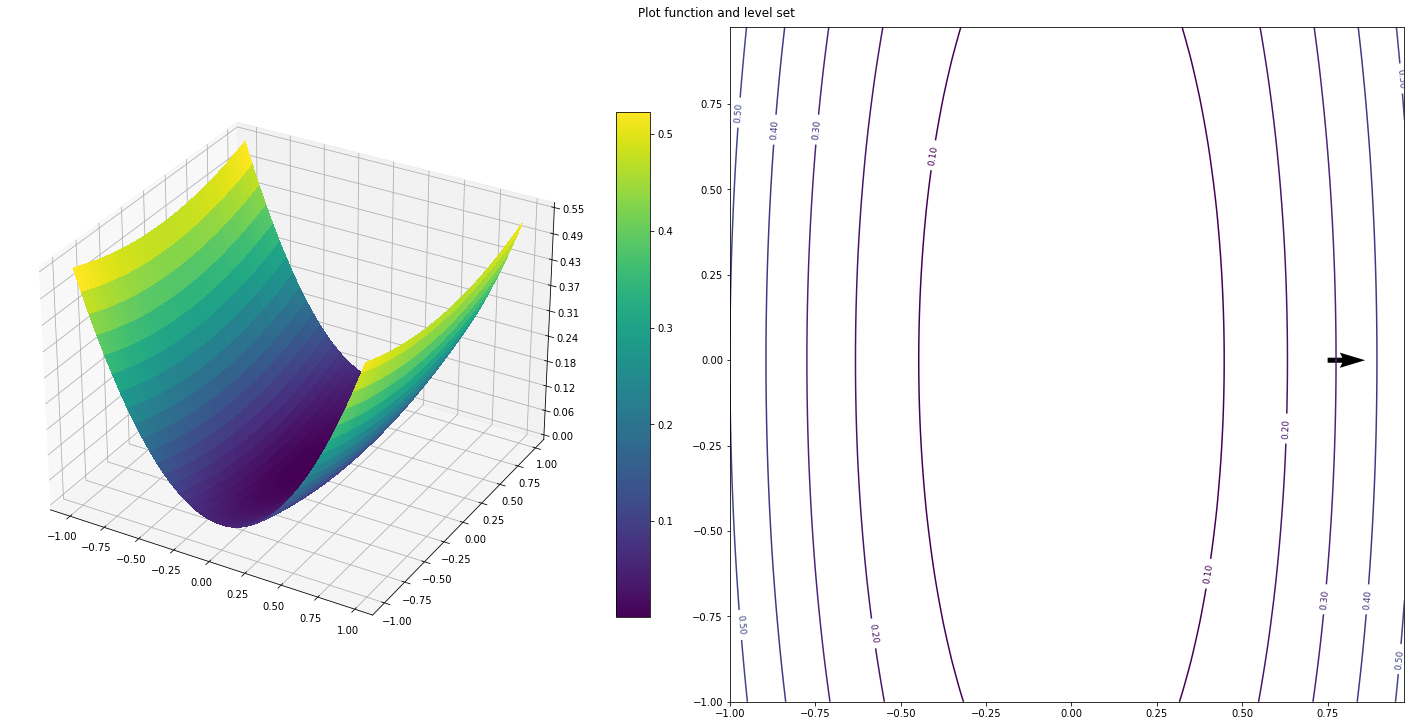

In [138]:
phi = lambda x: 0.5*x.dot(A.dot(x)) - x.dot(b)
# Set up a figure twice as tall as it is wide
fig = plt.figure(figsize=(20,10))
fig.suptitle('Plot function and level set')

# First subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')


# Make data.
x = np.arange(-1, 1, 0.025)
y = np.arange(-1.0, 1, 0.025)
X, Y = np.meshgrid(x, y)

Z = 0.5*(a11*X**2 + a22*Y**2)
# Plot the surface.

surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis,
                       linewidth=0, antialiased=False)

point = [0.75,0]
gradatpoint = [2*a11*point[0], 2*a22*point[1]]
# Customize the z axis.
#ax.set_zlim(0, 3)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.75, aspect=15)
plt.tight_layout()

ax = fig.add_subplot(1, 2, 2)

CS = ax.contour(X,Y, Z, levels=[0.1, 0.2, 0.3, 0.4, 0.5,0.75,1,1.5,2],)#,colors=['C05', 'C04', 'C03','C02', 'C01', 'C00'])
ax.clabel(CS, fontsize=9, inline=True)
ax.quiver(point[0], point[1], gradatpoint[0],gradatpoint[1])
ax.set_aspect('equal')

plt.show()

0.05500000000000001 0.03681818181818181 0.02464688204357626 0.016499152442394024


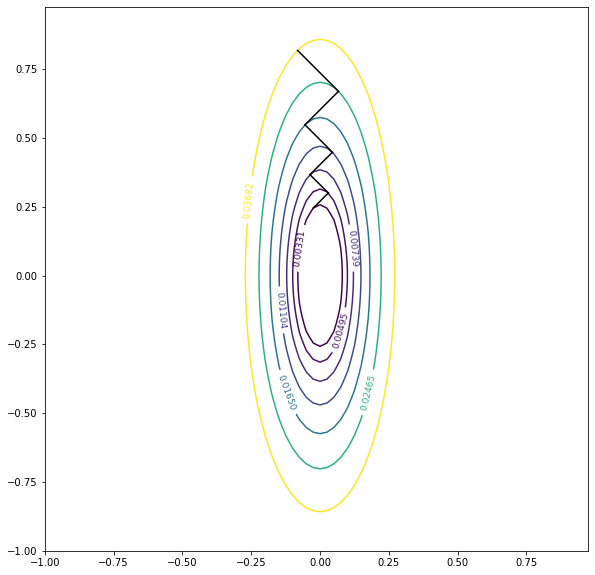

In [139]:
fig, ax = plt.subplots(1,1, figsize=(10,10))

X0 = Xlist[0]; x0 = X0[0]; y0 = X0[1]; f0 = phi(Xlist[0])
X1 = Xlist[1]; x1 = X1[0]; y1 = X1[1]; f1 = phi(Xlist[1])
X2 = Xlist[2]; x2 = X2[0]; y2 = X2[1]; f2 = phi(Xlist[2])
X3 = Xlist[3]; x3 = X3[0]; y3 = X3[1]; f3 = phi(Xlist[3])
X4 = Xlist[4]; x4 = X4[0]; y4 = X4[1]; f4 = phi(Xlist[4])
X5 = Xlist[5]; x5 = X5[0]; y5 = X5[1]; f5 = phi(Xlist[5])
X6 = Xlist[6]; x6 = X6[0]; y6 = X6[1]; f6 = phi(Xlist[6])
X7 = Xlist[7]; x7 = X7[0]; y7 = X7[1]; f7 = phi(Xlist[7])
print(f0,f1,f2,f3)
CS = ax.contour(X,Y, Z, levels=[f7,f6,f5,f4,f3,f2,f1])#,colors=['C05', 'C04', 'C03','C02', 'C01', 'C00'])
ax.clabel(CS, fontsize=9, inline=True)

ax.plot([x1,x2],[y1,y2],'k')


ax.plot([x2,x3],[y2,y3],'k')


ax.plot([x3,x4],[y3,y4],'k')


ax.plot([x4,x5],[y4,y5],'k')


ax.plot([x5,x6],[y5,y6],'k')

ax.plot([x6,x7],[y6,y7],'k')

ax.set_aspect('equal')

plt.show()

## Ejemplo 2:
\begin{equation*} A = \left(\begin{array}{ccc} 5&1&1\\1&5&-1 \\ 1&-1&5\end{array}\right), \quad b = \left( \begin{array}{c} 4\\2\\-4 \end{array}\right) \end{equation*}

In [65]:
A = np.array([[5,1,1],[1,5,-1],[1,-1,5]],dtype=np.float64) 
b = np.array([4,2,-4],dtype=np.float64)

x,n, X = SteepestDescent(A,b,x0=b)


 *** iteration 0 :
                 ||g||:  25.45584412271571 

 *** iteration 1 :
                 mu   :  0.17307692307692307
                ||g||:  3.461538461538462 

 *** iteration 2 :
                 mu   :  0.3103448275862069
                ||g||:  0.8440266618937552 

 *** iteration 3 :
                 mu   :  0.1730769230769231
                ||g||:  0.1147724954091 

 *** iteration 4 :
                 mu   :  0.31034482758620674
                ||g||:  0.02798496889568154 

 *** iteration 5 :
                 mu   :  0.1730769230769229
                ||g||:  0.0038054540918136663 

 *** iteration 6 :
                 mu   :  0.3103448275862208
                ||g||:  0.0009278835840739046 

 *** iteration 7 :
                 mu   :  0.17307692307692055
                ||g||:  0.00012617553354823643 

 *** iteration 8 :
                 mu   :  0.31034482758629056
                ||g||:  3.076537082375131e-05 

 *** iteration 9 :
                 mu   :  0.173076923076

## Ejemplo 3:

In [3]:
def testproblem(num, m):
    if num == 1:
    # Poisson matrix
        a = -1;
        b = a;
        c = 2;
    elif num == 2:
    # Averaging problem
        a = 1.0/9.0;
        b = a;
        c = 5.0/18.0;
    # end 
    C1 = c*np.diag(np.ones(m),0)+a*np.diag(np.ones(m-1),-1)+a*np.diag(np.ones(m-1),1);
    C2 = c*np.diag(np.ones(m),0)+b*np.diag(np.ones(m-1),-1)+b*np.diag(np.ones(m-1),1)
    A = np.kron(np.eye(m),C1) + np.kron(C2, np.eye(m))
    bvector = np.random.rand(m*m)
    return A, bvector

In [4]:
# Test: Averaging
kappa = np.zeros(5);
nn =np.zeros(5);
M = [5,10]#,20,40,80]
for m in range(len(M)):
    A, b = testproblem(2, M[m])
    #x,nn[m] = ConjugateGradient(A,b, 1000)
    x, nn[m], _ = SteepestDescent(A,b,x0=b)
    kappa[m] = np.linalg.cond(A)
print("m = ", M);
print("Condition number: ", kappa); # <=9
print("number ot iterations:", nn);

 *** iteration 0 :
                 ||g||:  0.6742530613722055 

 *** iteration 1 :
                 mu   :  1.7170331680075772
                ||g||:  0.23774889336249216 

 *** iteration 2 :
                 mu   :  1.9908851377256218
                ||g||:  0.1299669673653179 

 *** iteration 3 :
                 mu   :  1.6481482005219965
                ||g||:  0.06724564754877514 

 *** iteration 4 :
                 mu   :  1.841343347424696
                ||g||:  0.04216126576510009 

 *** iteration 5 :
                 mu   :  1.6105910972539874
                ||g||:  0.02378850770756401 

 *** iteration 6 :
                 mu   :  1.8471125383992266
                ||g||:  0.01566379713268854 

 *** iteration 7 :
                 mu   :  1.6292361933482054
                ||g||:  0.009241182689285038 

 *** iteration 8 :
                 mu   :  1.8769868662626703
                ||g||:  0.006357601077036879 

 *** iteration 9 :
                 mu   :  1.6522727176149539


## Ejemplo 4:

## Ejemplo 5:

In [ ]:
# I3 problem
def testI3():
    A = np.array([[3/2,0,1/2],[0,3,0],[1/2,0,3/2]]);
    b = np.array([1,1,-1]);
    ConjugateGradient(A,b,7)
    SteepestDescent(A,b,3)

testI3()